# Venn diagrams comparing sepsis frequencies

This notebook contains a number of Venn diagrams which visualize the proportion of patients who overlap given the various sepsis definitions.

In [1]:
# Import libraries
from __future__ import print_function


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

from sepsis_utils import sepsis_utils as su

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# load data
df = pd.read_csv('sepsis3-df.csv')

# add the composite outcome
df['composite_outcome'] = ( (df['hospital_expire_flag']==1) | (df['icu_los']>=3) ).astype(int)

# add some other useful variables
df['blood culture'] = (~df['blood_culture_time'].isnull())
df['suspicion_poe'] = (~df['suspected_infection_time_poe_days'].isnull())

df['abx_poe'] = (~df['antibiotic_time_poe'].isnull())

df['sepsis-3'] = ((df['suspicion_poe']==1) & (df['sofa']>=2)).astype(int)
df['sofa>=2'] = (df['sofa']>=2).astype(int)


for c in ['intime','outtime',
          'suspected_infection_time_mv','suspected_infection_time',
          'suspected_infection_time_poe', 'blood_culture_time']:
    if c in df.columns:
        if df[c].dtype == 'object':
            df[c] = pd.to_datetime(df[c])

## Venn diagrams from the publication

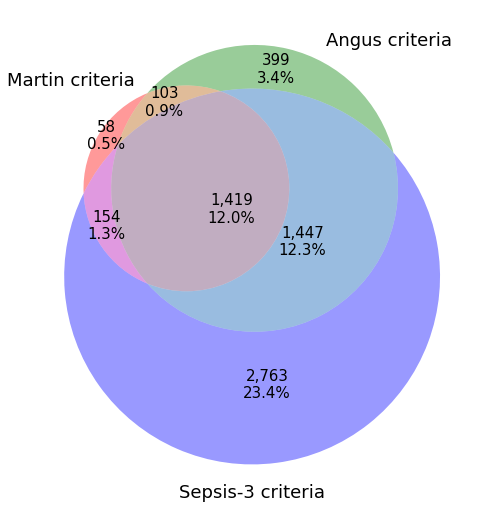

1419 patients (12.0%) satisfied all criteria.
5448 patients (46.2%) satisfied no criteria.
12.9% (1522) - sepsis_angus & sepsis_martin
13.3% (1573) - sepsis-3 & sepsis_martin
24.3% (2866) - sepsis-3 & sepsis_angus


In [3]:
# define labels here
# first label = red (top left)
# second label = green (top right)
# third label = blue (bottom)

venn_labels = OrderedDict([
        ['sepsis_martin', 'Martin criteria'],
        ['sepsis_angus', 'Angus criteria'],
        ['sepsis-3', 'Sepsis-3 criteria']
    ])
su.create_venn_diagram(df, venn_labels)

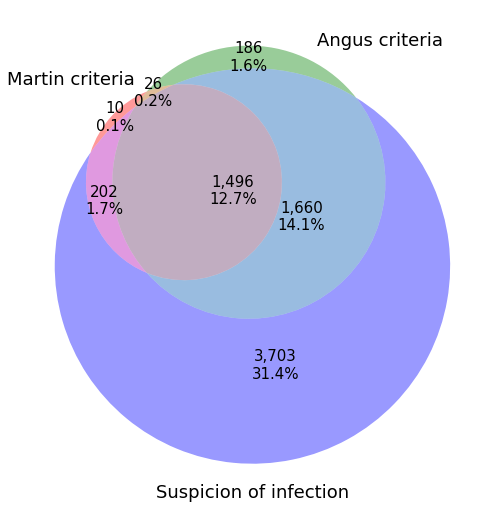

1496 patients (12.7%) satisfied all criteria.
4508 patients (38.2%) satisfied no criteria.
12.9% (1522) - sepsis_angus & sepsis_martin
14.4% (1698) - suspicion_poe & sepsis_martin
26.8% (3156) - suspicion_poe & sepsis_angus


In [4]:
venn_labels = OrderedDict([
        ['sepsis_martin', 'Martin criteria'],
        ['sepsis_angus', 'Angus criteria'],
        ['suspicion_poe', 'Suspicion of infection']
    ])
su.create_venn_diagram(df, venn_labels)

## Other venn diagrams

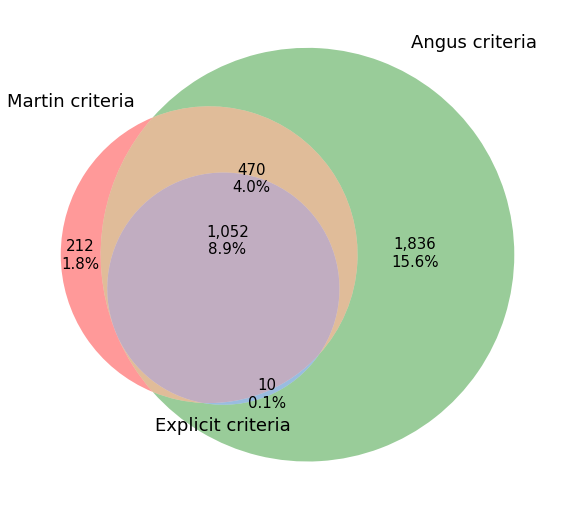

1052 patients (8.9%) satisfied all criteria.
8211 patients (69.6%) satisfied no criteria.
12.9% (1522) - sepsis_angus & sepsis_martin
8.9% (1052) - sepsis_explicit & sepsis_martin
9.0% (1062) - sepsis_explicit & sepsis_angus


In [5]:
venn_labels = OrderedDict([
        ['sepsis_martin', 'Martin criteria'],
        ['sepsis_angus', 'Angus criteria'],
        ['sepsis_explicit', 'Explicit criteria']
    ])
su.create_venn_diagram(df, venn_labels)

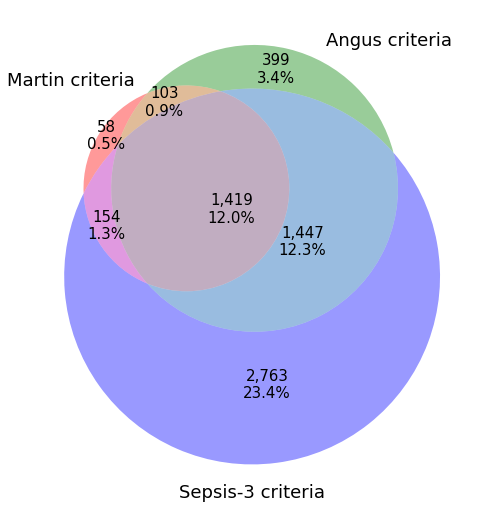

1419 patients (12.0%) satisfied all criteria.
5448 patients (46.2%) satisfied no criteria.
12.9% (1522) - sepsis_angus & sepsis_martin
13.3% (1573) - sepsis-3 & sepsis_martin
24.3% (2866) - sepsis-3 & sepsis_angus


In [6]:
venn_labels = OrderedDict([
        ['sepsis_martin', 'Martin criteria'],
        ['sepsis_angus', 'Angus criteria'],
        ['sepsis-3', 'Sepsis-3 criteria']
    ])
su.create_venn_diagram(df, venn_labels)

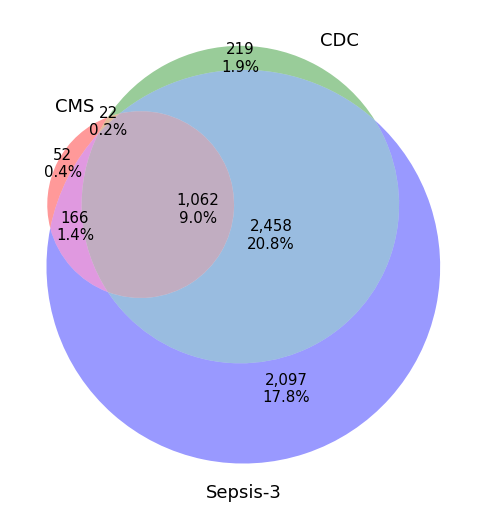

1062 patients (9.0%) satisfied all criteria.
5715 patients (48.5%) satisfied no criteria.
9.2% (1084) - sepsis_cdc & sepsis_nqf
10.4% (1228) - sepsis-3 & sepsis_nqf
29.9% (3520) - sepsis-3 & sepsis_cdc


In [7]:
venn_labels = OrderedDict([
        ['sepsis_nqf', 'CMS'],
        ['sepsis_cdc', 'CDC'],
        ['sepsis-3', 'Sepsis-3']
    ])
su.create_venn_diagram(df, venn_labels)

In [8]:
# 4-set venn diagram
venn_labels = OrderedDict([
        ['sofa>=2', 'SOFA >= 2'],
        ['sepsis_angus', 'Angus criteria'],
        ['suspicion_poe', 'Suspicion of infection'],
        ['sepsis_martin', 'Martin criteria']
    ])
su.create_venn_diagram(df, venn_labels)

4d Venn diagrams not currently implemented.
1419 patients (12.0%) satisfied all criteria.
1619 patients (13.7%) satisfied no criteria.
25.9% (3053) - sepsis_angus & sofa>=2
49.0% (5783) - suspicion_poe & sofa>=2
26.8% (3156) - suspicion_poe & sepsis_angus
13.6% (1605) - sepsis_martin & sofa>=2
12.9% (1522) - sepsis_martin & sepsis_angus
14.4% (1698) - sepsis_martin & suspicion_poe


In [9]:
venn_labels = OrderedDict([
        ['sepsis-3', 'Sepsis-3 criteria'],
        ['sepsis_angus', 'Angus et al. criteria'],
        ['sepsis_explicit', 'Explicit criteria'],
        ['sepsis_martin', 'Martin et al. criteria']
    ])
su.create_venn_diagram(df, venn_labels)

4d Venn diagrams not currently implemented.
998 patients (8.5%) satisfied all criteria.
5448 patients (46.2%) satisfied no criteria.
24.3% (2866) - sepsis_angus & sepsis-3
8.5% (1008) - sepsis_explicit & sepsis-3
9.0% (1062) - sepsis_explicit & sepsis_angus
13.3% (1573) - sepsis_martin & sepsis-3
12.9% (1522) - sepsis_martin & sepsis_angus
8.9% (1052) - sepsis_martin & sepsis_explicit


# Venn with CDC/NQF

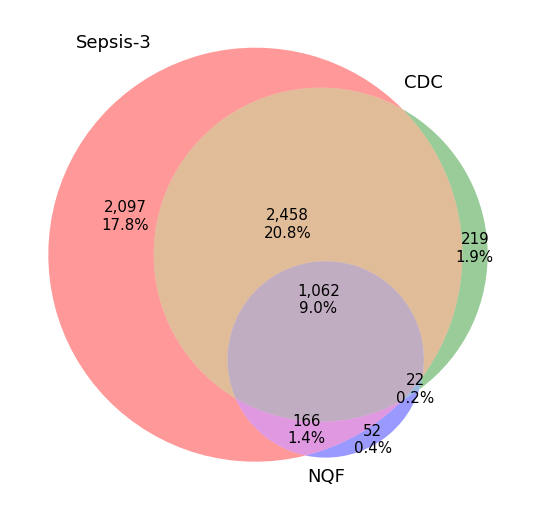

1062 patients (9.0%) satisfied all criteria.
5715 patients (48.5%) satisfied no criteria.
29.9% (3520) - sepsis_cdc & sepsis-3
10.4% (1228) - sepsis_nqf & sepsis-3
9.2% (1084) - sepsis_nqf & sepsis_cdc


In [10]:
venn_labels = OrderedDict([
        ['sepsis-3', 'Sepsis-3'],
        ['sepsis_cdc', 'CDC'],
        ['sepsis_nqf', 'NQF']
    ])
su.create_venn_diagram(df, venn_labels)

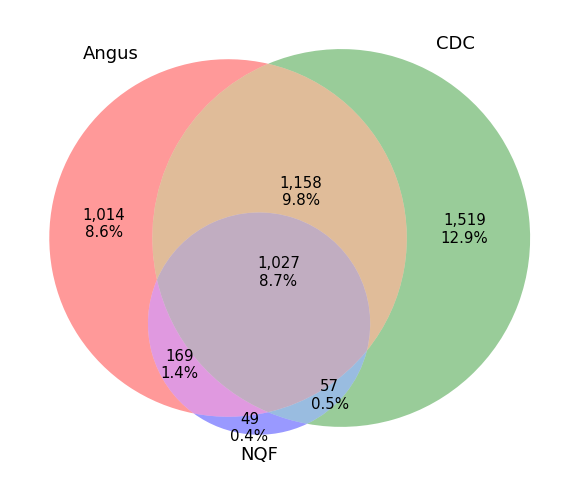

1027 patients (8.7%) satisfied all criteria.
6798 patients (57.7%) satisfied no criteria.
18.5% (2185) - sepsis_cdc & sepsis_angus
10.1% (1196) - sepsis_nqf & sepsis_angus
9.2% (1084) - sepsis_nqf & sepsis_cdc


In [11]:
venn_labels = OrderedDict([
        ['sepsis_angus', 'Angus'],
        ['sepsis_cdc', 'CDC'],
        ['sepsis_nqf', 'NQF']
    ])
su.create_venn_diagram(df, venn_labels)

In [12]:
venn_labels = OrderedDict([
        ['sepsis_martin', 'Martin'],
        ['sepsis_angus', 'Angus criteria'],
        ['sepsis_cdc', 'CDC'],
        ['sepsis_nqf', 'NQF']
    ])
su.create_venn_diagram(df, venn_labels)

4d Venn diagrams not currently implemented.
1017 patients (8.6%) satisfied all criteria.
6717 patients (57.0%) satisfied no criteria.
12.9% (1522) - sepsis_angus & sepsis_martin
11.0% (1299) - sepsis_cdc & sepsis_martin
18.5% (2185) - sepsis_cdc & sepsis_angus
11.0% (1292) - sepsis_nqf & sepsis_martin
10.1% (1196) - sepsis_nqf & sepsis_angus
9.2% (1084) - sepsis_nqf & sepsis_cdc


In [14]:
venn_labels = OrderedDict([
        ['sepsis-3', 'Sepsis-3'],
        ['sepsis_angus', 'Angus criteria'],
        ['sepsis_cdc', 'CDC'],
        ['sepsis_nqf', 'NQF']
    ])
su.create_venn_diagram(df, venn_labels)

4d Venn diagrams not currently implemented.
1011 patients (8.6%) satisfied all criteria.
5342 patients (45.3%) satisfied no criteria.
24.3% (2866) - sepsis_angus & sepsis-3
29.9% (3520) - sepsis_cdc & sepsis-3
18.5% (2185) - sepsis_cdc & sepsis_angus
10.4% (1228) - sepsis_nqf & sepsis-3
10.1% (1196) - sepsis_nqf & sepsis_angus
9.2% (1084) - sepsis_nqf & sepsis_cdc


# Venn diagram with mortality

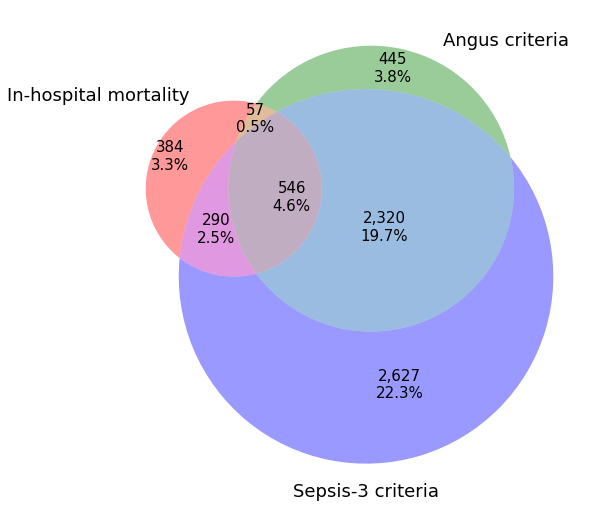

546 patients (4.6%) satisfied all criteria.
5122 patients (43.4%) satisfied no criteria.
5.1% (603) - sepsis_angus & hospital_expire_flag
7.1% (836) - sepsis-3 & hospital_expire_flag
24.3% (2866) - sepsis-3 & sepsis_angus


In [15]:
venn_labels = OrderedDict([
        ['hospital_expire_flag', 'In-hospital mortality'],
        ['sepsis_angus', 'Angus criteria'],
        ['sepsis-3', 'Sepsis-3 criteria']
    ])
su.create_venn_diagram(df, venn_labels)

In [16]:
venn_labels = OrderedDict([
        ['sofa>=2', 'SOFA >= 2'],
        ['sepsis_angus', 'Angus criteria'],
        ['suspicion_poe', 'Suspicion of infection'],
        ['hospital_expire_flag', 'In-hospital mortality']
    ])
su.create_venn_diagram(df, venn_labels)

4d Venn diagrams not currently implemented.
546 patients (4.6%) satisfied all criteria.
1568 patients (13.3%) satisfied no criteria.
25.9% (3053) - sepsis_angus & sofa>=2
49.0% (5783) - suspicion_poe & sofa>=2
26.8% (3156) - suspicion_poe & sepsis_angus
9.9% (1172) - hospital_expire_flag & sofa>=2
5.1% (603) - hospital_expire_flag & sepsis_angus
7.5% (886) - hospital_expire_flag & suspicion_poe
